<a href="https://colab.research.google.com/github/1985shree/Data-science-Zoomcamp-projects/blob/main/Week_3_zoomcamp_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#uploading ipynb from local folder to google drive/colab folder
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import io

df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data = df [['neighbourhood_group', 'room_type','latitude','longitude','price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [6]:
data.head(10).T


,0,1,2,3,4,5,6,7,8,9
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
latitude,40.6475,40.7536,40.809,40.6851,40.7985,40.7477,40.6869,40.7649,40.8018,40.7134
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944,-73.975,-73.956,-73.9849,-73.9672,-73.9904
price,149,225,150,89,80,200,60,79,79,150
minimum_nights,1,1,3,1,10,3,45,2,2,1
number_of_reviews,9,45,0,270,9,74,49,430,118,160
reviews_per_month,0.21,0.38,NaN,4.64,0.1,0.59,0.4,3.47,0.99,1.33
calculated_host_listings_count,6,2,1,1,1,1,1,1,1,4
availability_365,365,355,365,194,0,129,0,220,0,188


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [8]:
np.sum(data.isna())

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
data = data.fillna(0)

In [10]:
pd.value_counts(data.neighbourhood_group)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**correlation**

In [11]:
data_numeric = data.drop(['neighbourhood_group', 'room_type', 'price'], axis = 1)
data_numeric.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
corr = data_numeric.corr()
corr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.062747,0.059094,0.138516,-0.114713,0.082731
minimum_nights,0.024869,-0.062747,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.144303,0.172028,0.163732,0.225701,1.000000


[Text(0.5, 0, 'latitude'),
 Text(1.5, 0, 'longitude'),
 Text(2.5, 0, 'minimum_nights'),
 Text(3.5, 0, 'number_of_reviews'),
 Text(4.5, 0, 'reviews_per_month'),
 Text(5.5, 0, 'calculated_host_listings_count'),
 Text(6.5, 0, 'availability_365')]

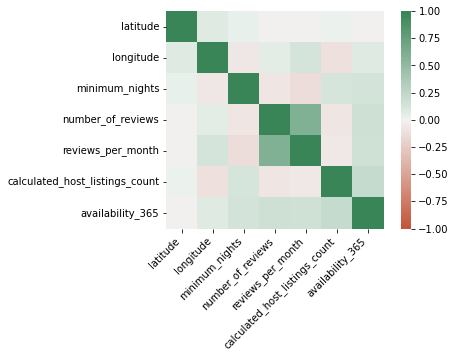

In [13]:
#visualizing correlation matrix
import seaborn as sns
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 500, n=200), square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

In [14]:
data_numeric.corr().unstack().sort_values(ascending = False)

availability_365                availability_365                  1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
longitude                       longitude                         1.000000
minimum_nights                  minimum_nights                    1.000000
reviews_per_month               reviews_per_month                 1.000000
number_of_reviews               number_of_reviews                 1.000000
latitude                        latitude                          1.000000
number_of_reviews               reviews_per_month                 0.589407
reviews_per_month               number_of_reviews                 0.589407
calculated_host_listings_count  availability_365                  0.225701
availability_365                calculated_host_listings_count    0.225701
                                number_of_reviews                 0.172028
number_of_reviews               availability_365                  0.172028
reviews_per_month        

**train-val-test split**

In [15]:
data_class = data.copy()
mean = data_class.price.mean()
data_class['above_average'] = np.where(data_class['price']>= mean, 1, 0)

In [16]:
data_class = data_class.drop(['price'], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(data_class, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)
print( len (df_train), len(df_val), len(df_test))

29337 9779 9779


In [19]:
df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)


y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']


**mutual information**

In [20]:
from sklearn.metrics import mutual_info_score

In [21]:
cat = ['neighbourhood_group', 'room_type']

In [22]:
def calculate_mi(series):
  return(mutual_info_score(series, df_train.above_average))
df_mi = df_train[cat].apply(calculate_mi)
df_mi

neighbourhood_group    0.046513
room_type              0.143035
dtype: float64

In [23]:
df_train.drop('above_average', axis = 1)
df_val.drop('above_average', axis = 1)
df_test.drop('above_average', axis = 1)

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,Brooklyn,Entire home/apt,40.64354,-73.97777,3,62,0.71,1,189
44383,Queens,Private room,40.70666,-73.90779,21,0,0.00,1,73
15394,Manhattan,Private room,40.76116,-73.99016,2,17,0.43,1,0
43230,Manhattan,Entire home/apt,40.70763,-74.01050,2,5,1.88,327,272
16332,Manhattan,Entire home/apt,40.79658,-73.93287,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...,...
20477,Manhattan,Entire home/apt,40.72543,-73.99129,2,18,0.70,1,68
44969,Manhattan,Private room,40.76352,-73.98280,1,0,0.00,6,294
36577,Queens,Private room,40.75914,-73.83352,1,5,0.82,4,5
11477,Manhattan,Entire home/apt,40.72179,-73.97951,2,0,0.00,1,0


**one-hot encoding**

In [24]:
from sklearn.feature_extraction import DictVectorizer


In [25]:
num = ['latitude', 'longitude', 	'minimum_nights',  	'number_of_reviews', 	'reviews_per_month', 	'calculated_host_listings_count', 	'availability_365']

In [26]:
train_dict = df_train[cat+num].to_dict(orient = 'records')
train_dict[0]

{'availability_365': 50,
 'calculated_host_listings_count': 13,
 'latitude': 40.7276,
 'longitude': -73.94495,
 'minimum_nights': 3,
 'neighbourhood_group': 'Brooklyn',
 'number_of_reviews': 29,
 'reviews_per_month': 0.7,
 'room_type': 'Entire home/apt'}

In [27]:
dv = DictVectorizer(sparse = False)

In [28]:
dv.fit(train_dict)
X_train = dv.transform(train_dict)

val_dict = df_val[cat+num].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

**logistic regression**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7857654156866756

**feature elimination**

numerical feature elimination: eliminate latitude-increase in accuracy? Y

In [32]:
elim_lat_num = ['longitude', 	'minimum_nights',  	'number_of_reviews', 	'reviews_per_month', 	'calculated_host_listings_count', 	'availability_365']

In [33]:
train_dict_1 = df_train[cat+elim_lat_num].to_dict(orient = 'records')
train_dict_1[0]

{'availability_365': 50,
 'calculated_host_listings_count': 13,
 'longitude': -73.94495,
 'minimum_nights': 3,
 'neighbourhood_group': 'Brooklyn',
 'number_of_reviews': 29,
 'reviews_per_month': 0.7,
 'room_type': 'Entire home/apt'}

In [34]:
dv = DictVectorizer(sparse = False)

In [104]:
dv.fit(train_dict_1)
X_train_1 = dv.transform(train_dict_1)

val_dict_1 = df_val[cat+elim_lat_num].to_dict(orient = 'records')
X_val_1 = dv.transform(val_dict_1)

In [105]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred_1 = model.predict(X_val_1)
accuracy = accuracy_score(y_val, y_pred_1)
accuracy

0.7860721955210144

numerical feature elimination: eliminate longitude-increase in accuracy? Y, little bit

In [107]:
elim_lon_num = ['latitude', 	'minimum_nights',  	'number_of_reviews', 	'reviews_per_month', 	'calculated_host_listings_count', 	'availability_365']

In [108]:
train_dict_2 = df_train[cat+elim_lon_num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_2)
X_train_2 = dv.transform(train_dict_2)

val_dict_2 = df_val[cat+elim_lon_num].to_dict(orient = 'records')
X_val_2 = dv.transform(val_dict_2)

In [109]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_2, y_train)

y_pred_2 = model.predict(X_val_2)
accuracy = accuracy_score(y_val, y_pred_2)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7859699355762347

numerical feature elimination: eliminate minimum_nights-increase in accuracy? N.

In [112]:
elim_nigh_num = ['latitude', 	'longitude',  	'number_of_reviews', 	'reviews_per_month', 	'calculated_host_listings_count', 	'availability_365']

In [113]:
train_dict_3 = df_train[cat+elim_nigh_num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_3)
X_train_3 = dv.transform(train_dict_3)

val_dict_3 = df_val[cat+elim_nigh_num].to_dict(orient = 'records')
X_val_3 = dv.transform(val_dict_3)

In [114]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_3, y_train)

y_pred_3 = model.predict(X_val_3)
accuracy = accuracy_score(y_val, y_pred_3)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7847428162388792

numerical feature elimination: eliminate number_of_reviews-increase in accuracy? Y

In [115]:
elim_rev_num = ['latitude', 	'longitude',  	'minimum_nights', 	'reviews_per_month', 	'calculated_host_listings_count', 	'availability_365']

In [116]:
train_dict_4 = df_train[cat+elim_rev_num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_4)
X_train_4 = dv.transform(train_dict_4)

val_dict_4 = df_val[cat+elim_rev_num].to_dict(orient = 'records')
X_val_4 = dv.transform(val_dict_4)

In [117]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_4, y_train)

y_pred_4 = model.predict(X_val_4)
accuracy = accuracy_score(y_val, y_pred_4)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7866857551896922

numerical feature elimination: eliminate number_of_reviews_per_month-increase in accuracy?N

In [119]:
elim_rev_pm_num = ['latitude', 	'longitude',  	'minimum_nights', 	'number_of_reviews', 	'calculated_host_listings_count', 	'availability_365']

In [120]:
train_dict_5 = df_train[cat+elim_rev_pm_num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_5)
X_train_5 = dv.transform(train_dict_5)

val_dict_5 = df_val[cat+elim_rev_pm_num].to_dict(orient = 'records')
X_val_5 = dv.transform(val_dict_5)

In [121]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_5, y_train)

y_pred_5 = model.predict(X_val_5)
accuracy = accuracy_score(y_val, y_pred_5)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7849473361284385

numerical feature elimination: eliminate calculated_host_listings_count-increase in accuracy? Y

In [122]:
elim_host_num = ['latitude', 	'longitude',  	'minimum_nights', 	'number_of_reviews', 	'reviews_per_month', 	'availability_365']

In [123]:
train_dict_6 = df_train[cat+elim_host_num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_6)
X_train_6 = dv.transform(train_dict_6)

val_dict_6 = df_val[cat+elim_host_num].to_dict(orient = 'records')
X_val_6 = dv.transform(val_dict_6)

In [124]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_6, y_train)

y_pred_6 = model.predict(X_val_6)
accuracy = accuracy_score(y_val, y_pred_6)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7862767154105736

numerical feature elimination: eliminate availability_365-increase in accuracy? Y, quite a bit.

In [125]:
elim_avail_num = ['latitude', 	'longitude',  	'minimum_nights', 	'number_of_reviews', 	'reviews_per_month', 	'calculated_host_listings_count']

In [126]:
train_dict_7 = df_train[cat+elim_avail_num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_7)
X_train_7 = dv.transform(train_dict_7)

val_dict_7 = df_val[cat+elim_avail_num].to_dict(orient = 'records')
X_val_7 = dv.transform(val_dict_7)

In [127]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_7, y_train)

y_pred_7 = model.predict(X_val_7)
accuracy = accuracy_score(y_val, y_pred_7)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7808569383372533

categorical feature elimination: eliminate neighbourhood_group-increase in accuracy? N

In [128]:
cat = ['neighbourhood_group', 'room_type']

In [129]:
cat_neig = ['room_type']

In [130]:
train_dict_8 = df_train[cat_neig + num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_8)
X_train_8 = dv.transform(train_dict_8)

val_dict_8 = df_val[cat_neig + num].to_dict(orient = 'records')
X_val_8 = dv.transform(val_dict_8)

In [131]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_8, y_train)

y_pred_8 = model.predict(X_val_8)
accuracy = accuracy_score(y_val, y_pred_8)
accuracy

0.7500766949585848

categorical feature elimination: eliminate room_type-increase in accuracy? N

In [132]:
cat_room_type = ['neighbourhood_group']

In [133]:
train_dict_9 = df_train[cat_room_type + num].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_9)
X_train_9 = dv.transform(train_dict_9)

val_dict_9 = df_val[cat_room_type + num].to_dict(orient = 'records')
X_val_9 = dv.transform(val_dict_9)

In [134]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train_9, y_train)

y_pred_9 = model.predict(X_val_9)
accuracy = accuracy_score(y_val, y_pred_9)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7132631148379179

**smallest diffference in accuracy is by eliminaing room type**

**training ridge regression**